In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import seaborn as sns
%matplotlib inline

In [4]:
train_df = pd.read_csv('data\pfm_train.csv')
test_df = pd.read_csv('data\pfm_test.csv')

In [5]:
train_df.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,36.999091,0.161818,9.427273,2.922727,1028.157273,2.725455,2.730909,2.054545,2.732727,6483.620909,...,2.696364,80.0,0.788182,11.221818,2.807273,2.746364,7.011818,4.207273,2.226364,4.123636
std,9.037230,0.368451,8.196694,1.022242,598.915204,1.098053,0.706366,1.107805,1.109731,4715.293419,...,1.095356,0.0,0.843347,7.825548,1.291514,0.701121,6.223093,3.618115,3.313830,3.597996
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,504.250000,2.000000,2.000000,1.000000,2.000000,2924.500000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1026.500000,3.000000,3.000000,2.000000,3.000000,4857.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,15.000000,4.000000,1556.500000,4.000000,3.000000,3.000000,4.000000,8354.500000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,2065.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [7]:
train_df=train_df.drop(['Over18','StandardHours','EmployeeNumber'],axis=1)

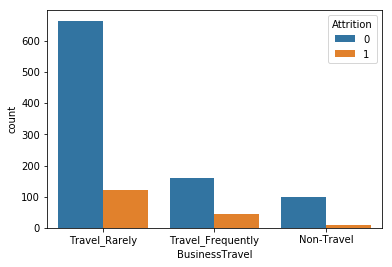

In [8]:
sns.countplot(x='BusinessTravel',hue='Attrition', data=train_df)

In [9]:
train_df['Department'].unique()

array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

In [10]:
train_df['Attrition'].value_counts()

0    922
1    178
Name: Attrition, dtype: int64

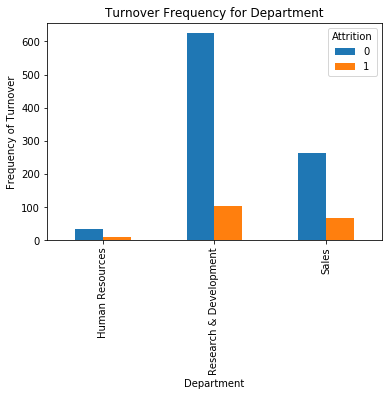

In [11]:
pd.crosstab(train_df.Department, train_df.Attrition).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

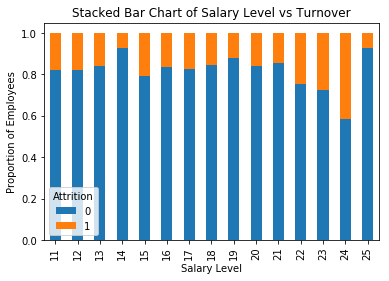

In [12]:
table=pd.crosstab(train_df.PercentSalaryHike, train_df.Attrition)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_char')

In [13]:
train_df.PercentSalaryHike.unique()

array([18, 17, 24, 16, 15, 12, 13, 21, 11, 14, 20, 19, 22, 23, 25],
      dtype=int64)

In [14]:
train_df.shape
train_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [16]:
train_df.OverTime.replace('Yes',1,inplace=True)
train_df.OverTime.replace('No',0,inplace=True)

In [17]:
train_df.BusinessTravel.replace('Non-Travel',1,inplace=True)
train_df.BusinessTravel.replace('Travel_Rarely',2,inplace=True)
train_df.BusinessTravel.replace('Travel_Frequently',3,inplace=True)

In [18]:
train_df.BusinessTravel.unique()

array([2, 3, 1], dtype=int64)

In [21]:
cat_vars=['Department','MaritalStatus','JobRole']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list=pd.get_dummies(train_df[var],prefix=var)
    hrl=train_df.join(cat_list)
train_df=hrl

In [24]:
drop_cols = ['Department','MaritalStatus','JobRole','EducationField']
train_df.drop(columns=drop_cols,inplace=True)
train_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative'],
      dtype='object')

In [25]:
train_df.Gender.replace('Male',0,inplace=True)
train_df.Gender.replace('Female',1,inplace=True)

In [26]:
len(train_df.columns.tolist())

33

In [27]:
train_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative'],
      dtype='object')

In [28]:
hr_vars=train_df.columns.values.tolist()
y=['Attrition']
X=[i for i in hr_vars if i not in y]

In [29]:
hr = train_df
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 33 columns):
Age                                  1100 non-null int64
Attrition                            1100 non-null int64
BusinessTravel                       1100 non-null int64
DistanceFromHome                     1100 non-null int64
Education                            1100 non-null int64
EnvironmentSatisfaction              1100 non-null int64
Gender                               1100 non-null int64
JobInvolvement                       1100 non-null int64
JobLevel                             1100 non-null int64
JobSatisfaction                      1100 non-null int64
MonthlyIncome                        1100 non-null int64
NumCompaniesWorked                   1100 non-null int64
OverTime                             1100 non-null int64
PercentSalaryHike                    1100 non-null int64
PerformanceRating                    1100 non-null int64
RelationshipSatisfaction             1

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 15)
rfe = rfe.fit(hr[X], hr[y])
print(rfe.support_)
print(rfe.ranking_)

D:\Anaconda\envs\Pytorch-CUDA10.0\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\envs\Pytorch-CUDA10.0\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\envs\Pytorch-CUDA10.0\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\envs\Pytorch-CUDA10.0\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\envs\Pytorch-CUDA10.0\lib\site-packages\sklearn\linear_model\logistic

[False  True False False  True  True  True False  True False False  True
 False False False  True False False  True False False False False  True
  True  True False  True  True False  True  True]
[15  1 14 12  1  1  1 17  1 18  6  1 16  2  3  1  8  5  1 10  4  7  9  1
  1  1 13  1  1 11  1  1]


D:\Anaconda\envs\Pytorch-CUDA10.0\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\envs\Pytorch-CUDA10.0\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\envs\Pytorch-CUDA10.0\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\envs\Pytorch-CUDA10.0\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\envs\Pytorch-CUDA10.0\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

In [32]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative'],
      dtype='object')

In [33]:
len(hr.columns)

33

In [38]:
cols=['BusinessTravel','EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobSatisfaction', 'OverTime'
      ,'StockOptionLevel','WorkLifeBalance',  'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician','JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Sales Executive',
       'JobRole_Sales Representative']

X=hr[cols]
y=hr['Attrition']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.219, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

D:\Anaconda\envs\Pytorch-CUDA10.0\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.6f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.887967


随机森林

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Random Forest Accuracy: {:.5f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.83817


D:\Anaconda\envs\Pytorch-CUDA10.0\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [45]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print("Support vector machine accuracy: {:.5f}".format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.86307


D:\Anaconda\envs\Pytorch-CUDA10.0\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [46]:
print(SVC())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
